Enter the image file path: /content/capela.jpg
1: Sem Filtro
2: Sobel
3: Passa-Baixas
4: Passa-Altas
5: Passa-Altas Normalizado
6: Melhorar
Selecione um filtro: 3
Digite a ordem da máscara: 2


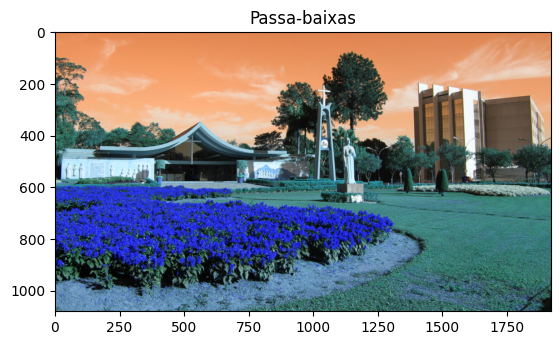

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#!pip install tk

# Function for Sobel filter
def sobel(im, limiar):
    R = im[:, :, 0]
    G = im[:, :, 1]
    B = im[:, :, 2]
    Y = 0.587 * G + 0.299 * R + 0.114 * B

    plt.figure()
    plt.imshow(Y, cmap='gray')
    plt.title('luminancia')

    Bin = np.zeros_like(Y)
    Bin[Y > limiar] = 255
    Bin[Y <= limiar] = 0

    plt.figure()
    plt.imshow(Bin, cmap='gray')
    plt.title('imagem binaria')

    sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # Sobel mask in x
    sobely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  # Sobel mask in y

    rx = cv2.filter2D(Bin, -1, sobelx)
    ry = cv2.filter2D(Bin, -1, sobely)

    gxy = np.sqrt(rx**2 + ry**2)
    return gxy

# Function for low-pass filter
def fpb(im, N):
    hpb = np.ones((N, N)) / (N**2)
    Im_pb = np.zeros_like(im)

    for i in range(3):
        Im_pb[:, :, i] = cv2.filter2D(im[:, :, i], -1, hpb)

    return Im_pb

# Function for high-pass filter
def fpa(im, N):
    hpa = np.ones((N, N)) / (-N**2)
    center = N // 2
    hpa[center, center] = (N**2 - 1) / N**2
    Im_pa = np.zeros_like(im)

    for i in range(3):
        Im_pa[:, :, i] = cv2.filter2D(im[:, :, i], -1, hpa)

    return Im_pa

# Function for normalized high-pass filter
def fpan(im, N):
    Im_pa = fpa(im, N)
    Im_pan = np.zeros_like(im)

    for i in range(3):
        Im_pan[:, :, i] = Im_pa[:, :, i] * 255 / np.max(Im_pa[:, :, i])

    return Im_pan

# Load the image using a file dialog
file_path = input("Enter the image file path: ")
if not file_path:
    sys.exit()

im = cv2.imread(file_path).astype(float)

# Select a filter
options = ['Sem Filtro', 'Sobel', 'Passa-Baixas', 'Passa-Altas', 'Passa-Altas Normalizado', 'Melhorar']
print("\n".join([f"{i + 1}: {option}" for i, option in enumerate(options)]))
op = int(input("Selecione um filtro: "))

if op == 2:
    limiar = float(input("Digite o valor do limiar: "))
    gxy = sobel(im, limiar)
    plt.figure()
    plt.imshow(gxy, cmap='gray')
    plt.title('contorno da imagem')
elif op in (3, 4, 5):
    N = int(input("Digite a ordem da máscara: "))
    if op == 3:
        Im_pb = fpb(im, N)
        plt.figure()
        plt.imshow(Im_pb.astype(np.uint8))
        plt.title('Passa-baixas')
    elif op == 4:
        Im_pa = fpa(im, N)
        plt.figure()
        plt.imshow(Im_pa.astype(np.uint8))
        plt.title('Passa-altas')
    elif op == 5:
        Im_pan = fpan(im, N)
        plt.figure()
        plt.imshow(Im_pan.astype(np.uint8))
        plt.title('Passa-altas normalizado')
elif op == 6:
    Im_melhorada = im + fpa(im, N)
    plt.figure()
    plt.imshow(Im_melhorada.astype(np.uint8))
    plt.title('Imagem melhorada')

if op != 1:
    plt.show()